In [1]:
from util_comp import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import time

from sklearn.model_selection import train_test_split


# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(main(one_hot=True))
print(df.shape)
df.head()

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute complete MICE imputation: 1 minutes and 21 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 55 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 3 minutes and 31 seconds
(44535, 427)


,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A man,)","(Q1- Your sex?_A woman,)","(Q1- Your sex?_None,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)","(Q2- How old are you?_40 - 44,)","(Q2- How old are you?_45 - 49,)","(Q2- How old are you?_50 - 55,)","(Q2- How old are you?_56 - 70,)","(Q2- How old are you?_None,)","(STATUS_AM Technicians,)","(STATUS_Employees,)","(STATUS_Frames,)","(STATUS_Workers,)","(In which sector of activity do you work?_Construction,)","(In which sector of activity do you work?_Design office and engineering,)","(In which sector of activity do you work?_Human health and social action,)","(In which sector of activity do you work?_Industry,)","(In which sector of activity do you work?_Other businesses,)","(In which sector of activity do you work?_Retail business,)","(In which sector of activity do you work?_Services,)","(In which sector of activity do you work?_Transport, energy, telecommunications,)","(In which sector of activity do you work?_Wholesale trade (all businesses in 206),)","(What is the size of your business (in total, all locations combined)? 2009 fake_10 to 49 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_1000 to 4999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_5000 employees and more,)","(What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_None,)","(Would you say that over the last 12 months, your company's activity has:_Accelerated,)","(Would you say that over the last 12 months, your company's activity has:_Do not know,)","(Would you say that over the last 12 months, your company's activity has:_Slow down,)","(Would you say that over the last 12 months, your company's activity has:_Stabilized,)","(Would you say that over the last 12 months, your company's activity has:_None,)","(Would you say that over the last 12 months, your company's activity has:_nan,)","(Q9- Are you working?_Part time,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_None,)","(Q12- Do you work most often?_At customers,)","(Q12- Do you work most often?_At home teleworking,)","(Q12- Do you work most often?_In a commercial premises or agency,)","(Q12- Do you work most often?_In a shared office (3 to 5 people),)","(Q12- Do you work most often?_In a shared work space - co-working,)","(Q12- Do you work most often?_In a vehicle,)","(Q12-

In [3]:
data = df

# Split the data for training and evaluation
# X: features with the outcome column removed, where outcome is 0 or 1
# y: outcome column

# get the rows withs outcome 0 or 1
X = data[(data['outcome'] == 0) | (data['outcome'] == 1)].drop('outcome', axis=1, inplace=False)
X.columns = [str(i) for i in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 1)]['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test,score_func, k):
 fs = SelectKBest(score_func, k=k)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

### Chi Sq

Feature 0: 1.832396
Feature 1: 69.335076
Feature 2: 166.177314
Feature 3: 246.188361
Feature 4: 15.674149
Feature 5: 18.395946
Feature 6: 0.344340
Feature 7: 136.100189
Feature 8: 77.070106
Feature 9: 3.660020
Feature 10: 69.970443
Feature 11: 75.572437
Feature 12: 83.045311
Feature 13: 5.826096
Feature 14: 3.821871
Feature 15: 0.000134
Feature 16: 52.791420
Feature 17: 36.939867
Feature 18: 7.778719
Feature 19: 46.945047
Feature 20: 0.016057
Feature 21: 1.402251
Feature 22: 0.063549
Feature 23: 13.536127
Feature 24: 4.349277
Feature 25: 3.027103
Feature 26: 0.885057
Feature 27: 4.596518
Feature 28: 52.564244
Feature 29: 56.442028
Feature 30: 10.766346
Feature 31: 51.836796
Feature 32: 42.788208
Feature 33: 0.215756
Feature 34: 1.559404
Feature 35: 8.378285
Feature 36: 0.832299
Feature 37: 0.043742
Feature 38: 0.664268
Feature 39: 4.815574
Feature 40: 4.130530
Feature 41: 5.028894
Feature 42: nan
Feature 43: 23.247900
Feature 44: 3.060017
Feature 45: 11.906060
Feature 46: 6.468349
Feat

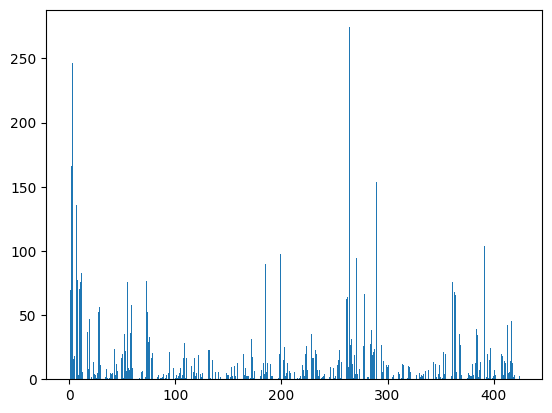

In [26]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


min: 0.0001336211450283463
max: 274.1891752752727


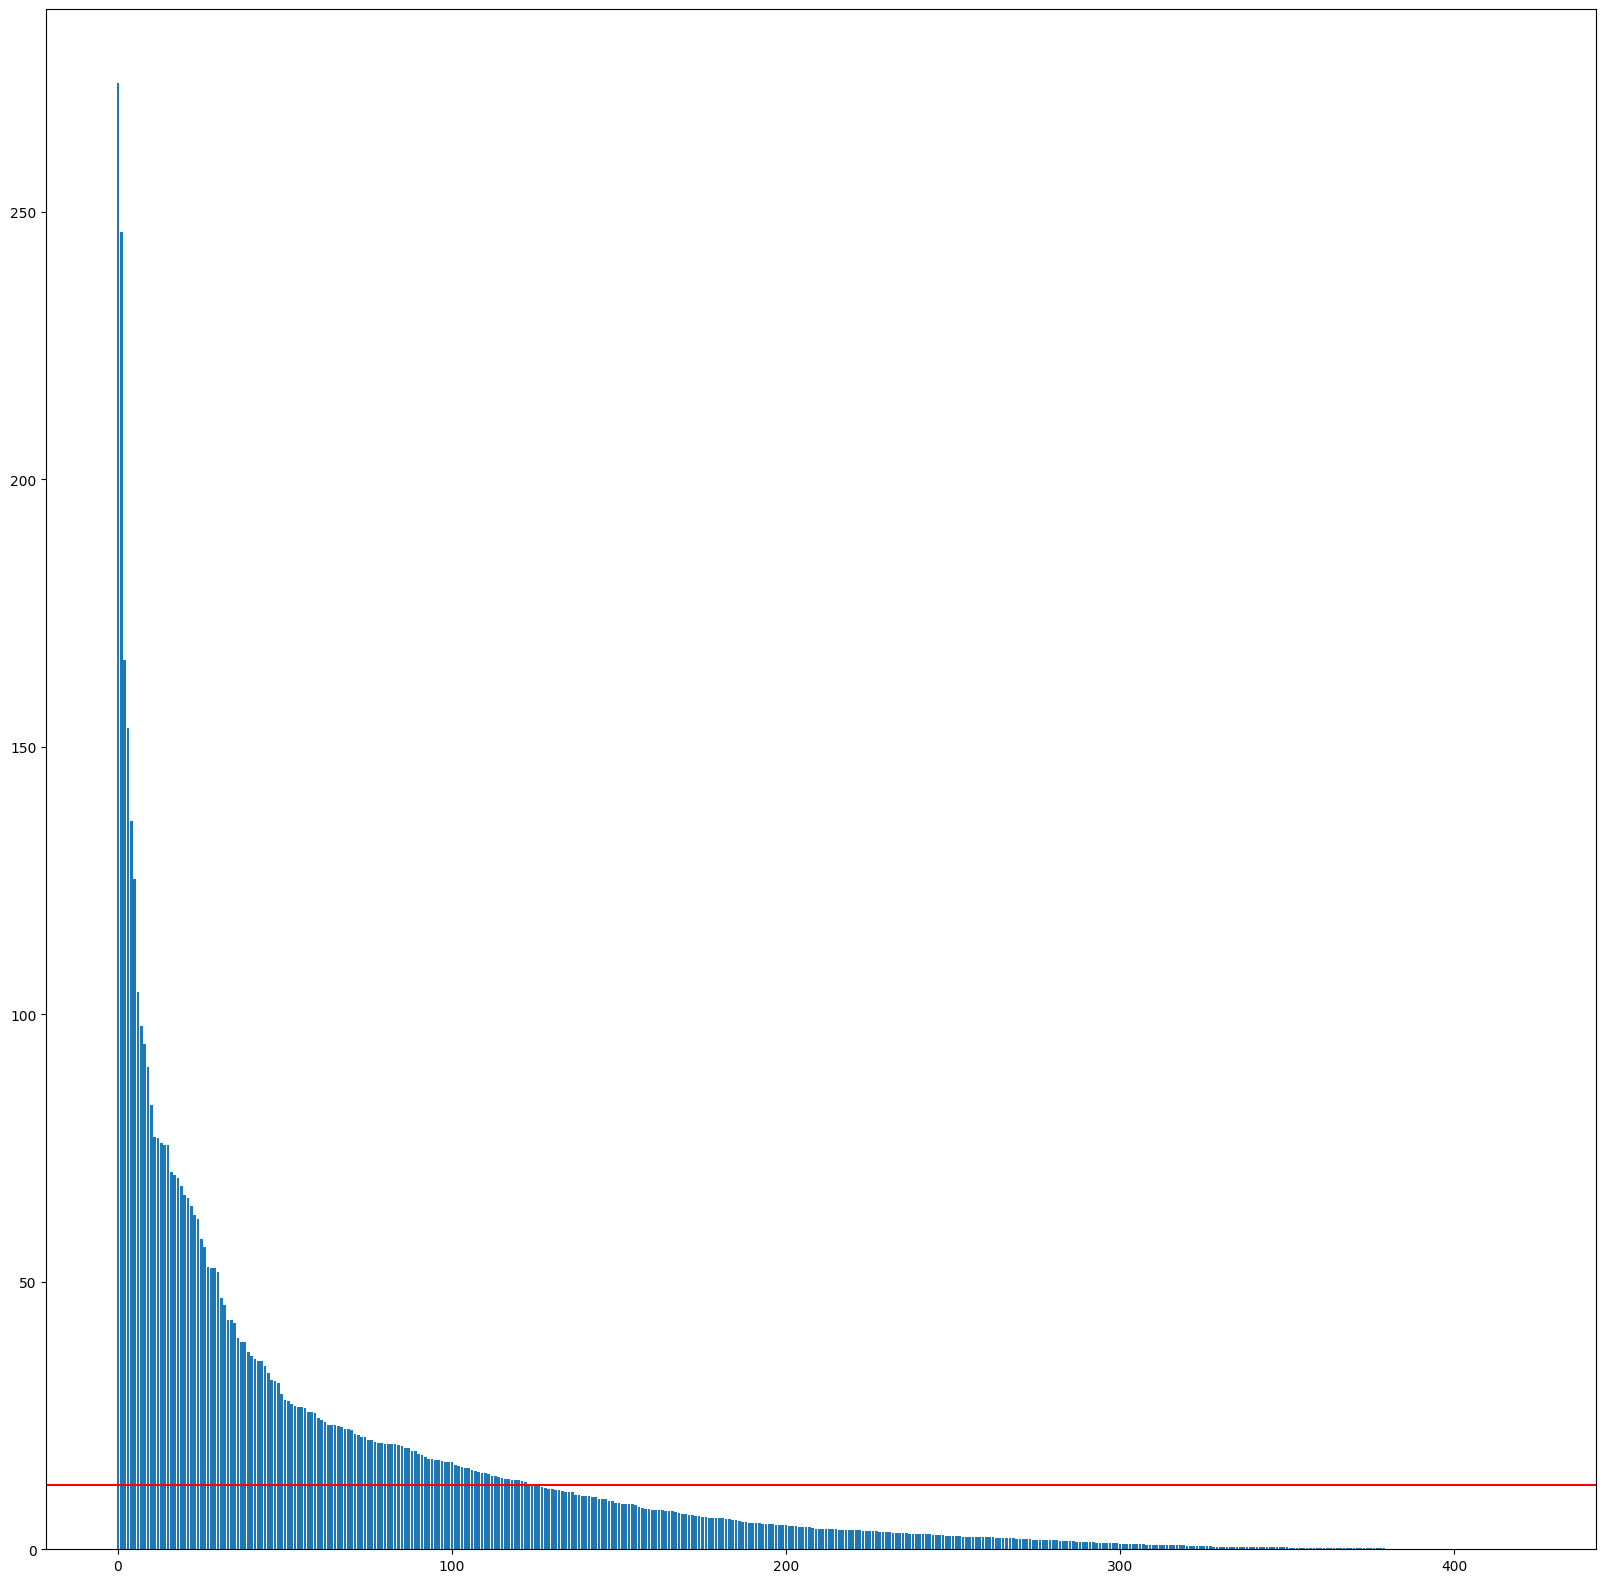

number of features with scores above the threshold: 126


In [27]:
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
print(f"min: {min(scores)}")
print(f"max: {max(scores)}")

# sort the scores in descending order
scores.sort(reverse=True)

# get the threshold

threshold = 12
# plot the scores
# draw a vertical line at the threshold
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()

# get the number of features with scores above the threshold

num_features = len([i for i in scores if i > threshold])
print(f"number of features with scores above the threshold: {num_features}")


In [28]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)

In [29]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.46209350741583727 
test accuracy: 0.8524 
train accuracy: 1.0000 
ROAUC: 0.7019063917279583 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       0.67      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.76      0.50      0.46      6959
weighted avg       0.83      0.85      0.78      6959


Elapsed time to compute Random Forest 1/1: 0 minutes and 3 seconds
average test accuracy: 0.8524213249030033


In [30]:
max2 = max(scores)
min2 = min(scores)
range2 =  max2 - min2
print(f"range: {range2}")

# get the threshold
threshold = min(scores) + range2 * 0.1
print(f"threshold: {threshold}")

range: 274.18904165412766
threshold: 27.419037786557798


In [31]:
threshold = min2 + (range2 * 0.1)
print(f"threshold: {threshold}")

threshold: 27.419037786557798


In [32]:
accuracy_scores = []
for i in range(1,21):
    print(f"{i}:\n")
    threshold = min2 + (range2 * 0.05 * i)
    print(f"Threshold: {threshold}")
    num_features = len([sc for sc in scores if sc > threshold])
    print(f"number of features with scores above the threshold: {num_features}")
    if num_features == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold,np.mean(test_accuracies)))

1:

Threshold: 13.709585703851413
number of features with scores above the threshold: 114
Forest 1/2 trained with 
F1 score: 0.46213727829907253 
test accuracy: 0.8526 
train accuracy: 1.0000 
ROAUC: 0.6926367722977668 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.46      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 3 seconds
Forest 2/2 trained with 
F1 score: 0.46213727829907253 
test accuracy: 0.8526 
train accuracy: 1.0000 
ROAUC: 0.6982516022455383 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50    

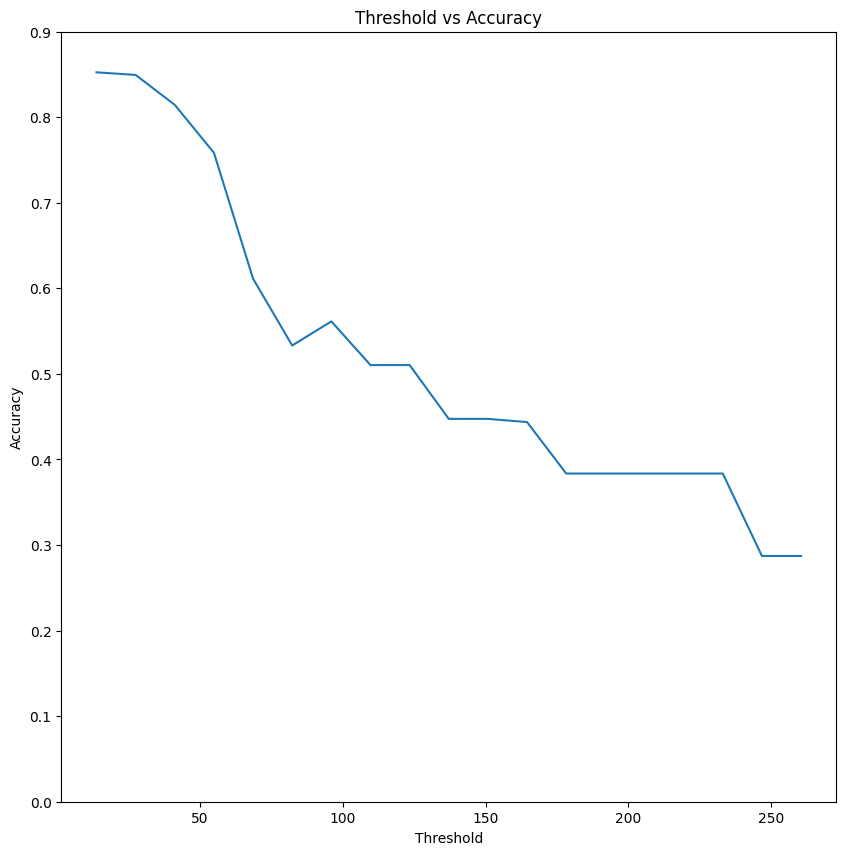

In [33]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
# plt.xticks(np.arange(min([i[0] for i in accuracy_scores]), max([i[0] for i in accuracy_scores])+0.1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [34]:
accuracy_scores = []
prev_num_feat = 0
th = 40
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= 1
        continue
    if th < 17:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((th,np.mean(test_accuracies)))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= 1

Threshold: 40
number of features with scores above the threshold: 36
Forest 1/2 trained with 
F1 score: 0.5212317864395237 
test accuracy: 0.8135 
train accuracy: 0.9587 
ROAUC: 0.6299452458132335 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5931
           1       0.23      0.11      0.15      1028

    accuracy                           0.81      6959
   macro avg       0.54      0.52      0.52      6959
weighted avg       0.77      0.81      0.78      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 2 seconds
Forest 2/2 trained with 
F1 score: 0.5191731161807971 
test accuracy: 0.8155 
train accuracy: 0.9592 
ROAUC: 0.625620626176385 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5931
           1       0.23      0.10      0.14      1028

    accuracy                           0.82      6959
   macro avg       0.54      0.52      0.52      6959
weighte

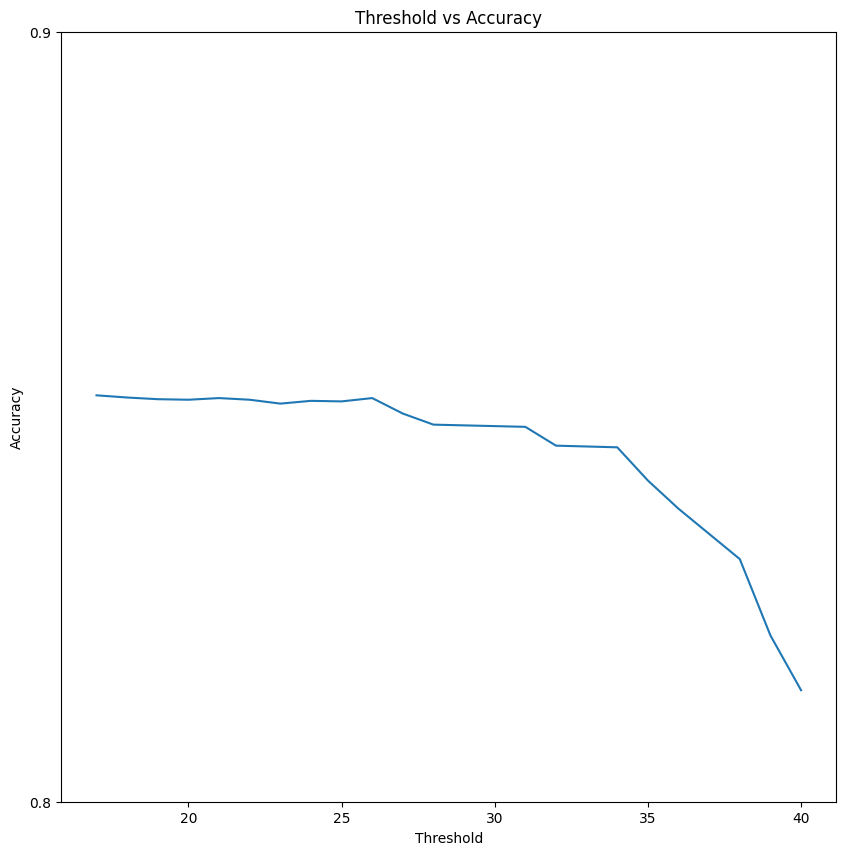

In [35]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
plt.yticks(np.arange(0.8, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

diff: 0.009915217703693191, accuracy: 0.8215979307371748, threshold: 39
diff: 0.006538295732145372, accuracy: 0.831513148440868, threshold: 38
diff: 0.0036643195861474354, accuracy: 0.8380514441730134, threshold: 36
diff: 0.004310964218997015, accuracy: 0.8417157637591608, threshold: 35
diff: 0.00021554821094982302, accuracy: 0.8460267279781578, threshold: 34
diff: 0.0024428797240982902, accuracy: 0.8462422761891076, threshold: 32
diff: 0.000287397614599727, accuracy: 0.8486851559132059, threshold: 31
diff: 0.0014369880729990792, accuracy: 0.8489725535278057, threshold: 28
diff: 0.002011783302198533, accuracy: 0.8504095416008047, threshold: 27
diff: -0.00043109642189964603, accuracy: 0.8524213249030033, threshold: 26
diff: 7.184940365001502e-05, accuracy: 0.8519902284811036, threshold: 25
diff: -0.00035924701824985306, accuracy: 0.8520620778847536, threshold: 24
diff: 0.000502945825549661, accuracy: 0.8517028308665038, threshold: 23
diff: 0.00021554821094982302, accuracy: 0.85220577669

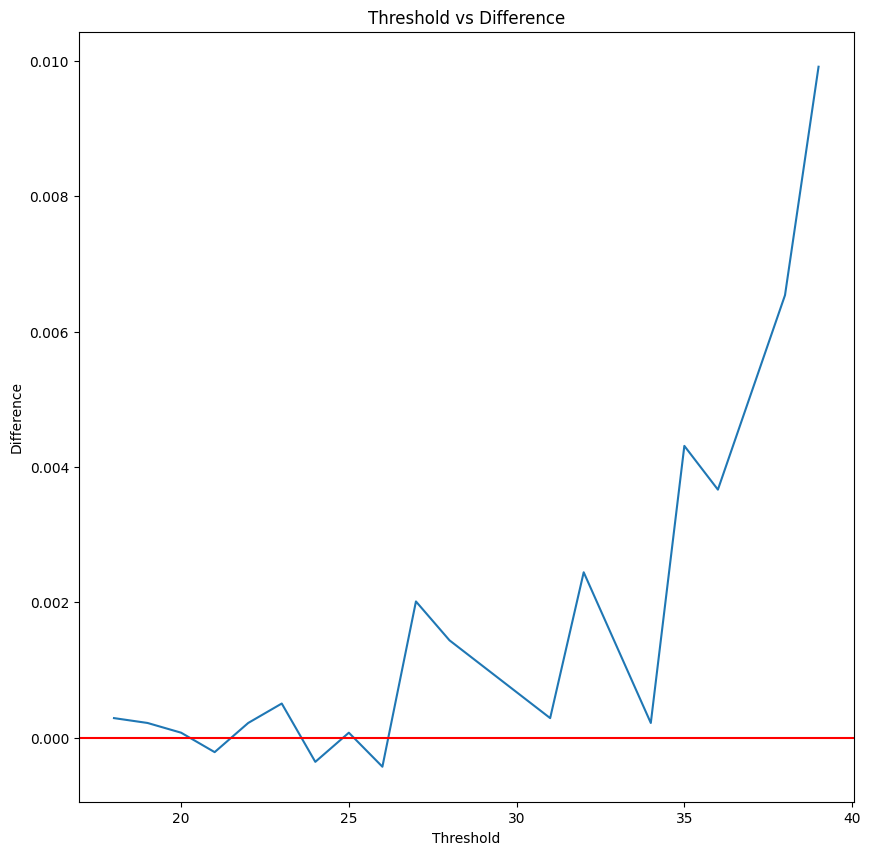

In [36]:
diff = []
for i in range(1,len(accuracy_scores)-1):
    dif = accuracy_scores[i+1][1] - accuracy_scores[i][1]
    print(f"diff: {dif}, accuracy: {accuracy_scores[i][1]}, threshold: {accuracy_scores[i][0]}")
    diff.append((dif,accuracy_scores[i][0]))

# plot the dif
plt.figure(figsize=(10,10))
plt.plot([i[1] for i in diff], [i[0] for i in diff])
# horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Difference')
plt.title('Threshold vs Difference')
plt.show()


### Mutual info class

Feature 0: 0.000000
Feature 1: 0.003193
Feature 2: 0.005701
Feature 3: 0.004847
Feature 4: 0.004568
Feature 5: 0.003538
Feature 6: 0.000420
Feature 7: 0.001858
Feature 8: 0.001506
Feature 9: 0.003380
Feature 10: 0.003478
Feature 11: 0.002785
Feature 12: 0.000000
Feature 13: 0.001961
Feature 14: 0.002191
Feature 15: 0.002398
Feature 16: 0.000000
Feature 17: 0.001487
Feature 18: 0.002404
Feature 19: 0.002764
Feature 20: 0.000000
Feature 21: 0.000000
Feature 22: 0.000285
Feature 23: 0.001239
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.001310
Feature 27: 0.000000
Feature 28: 0.002080
Feature 29: 0.001152
Feature 30: 0.000156
Feature 31: 0.000000
Feature 32: 0.003439
Feature 33: 0.006631
Feature 34: 0.000000
Feature 35: 0.000148
Feature 36: 0.000991
Feature 37: 0.000068
Feature 38: 0.000000
Feature 39: 0.002016
Feature 40: 0.002805
Feature 41: 0.000000
Feature 42: 0.000013
Feature 43: 0.000000
Feature 44: 0.005205
Feature 45: 0.000116
Feature 46: 0.000657
Feature 47: 0.000000
Fe

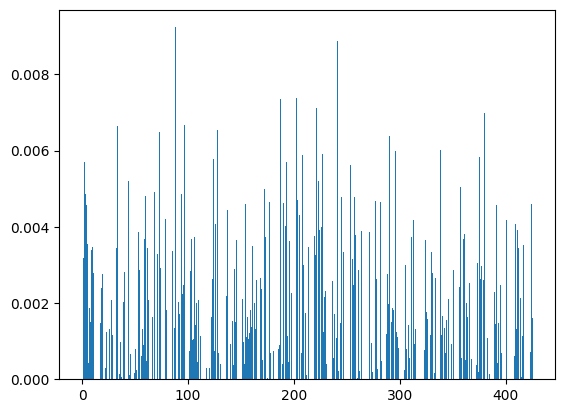

In [37]:
from sklearn.feature_selection import mutual_info_classif
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

min: 0.0
max: 0.009232722375580371


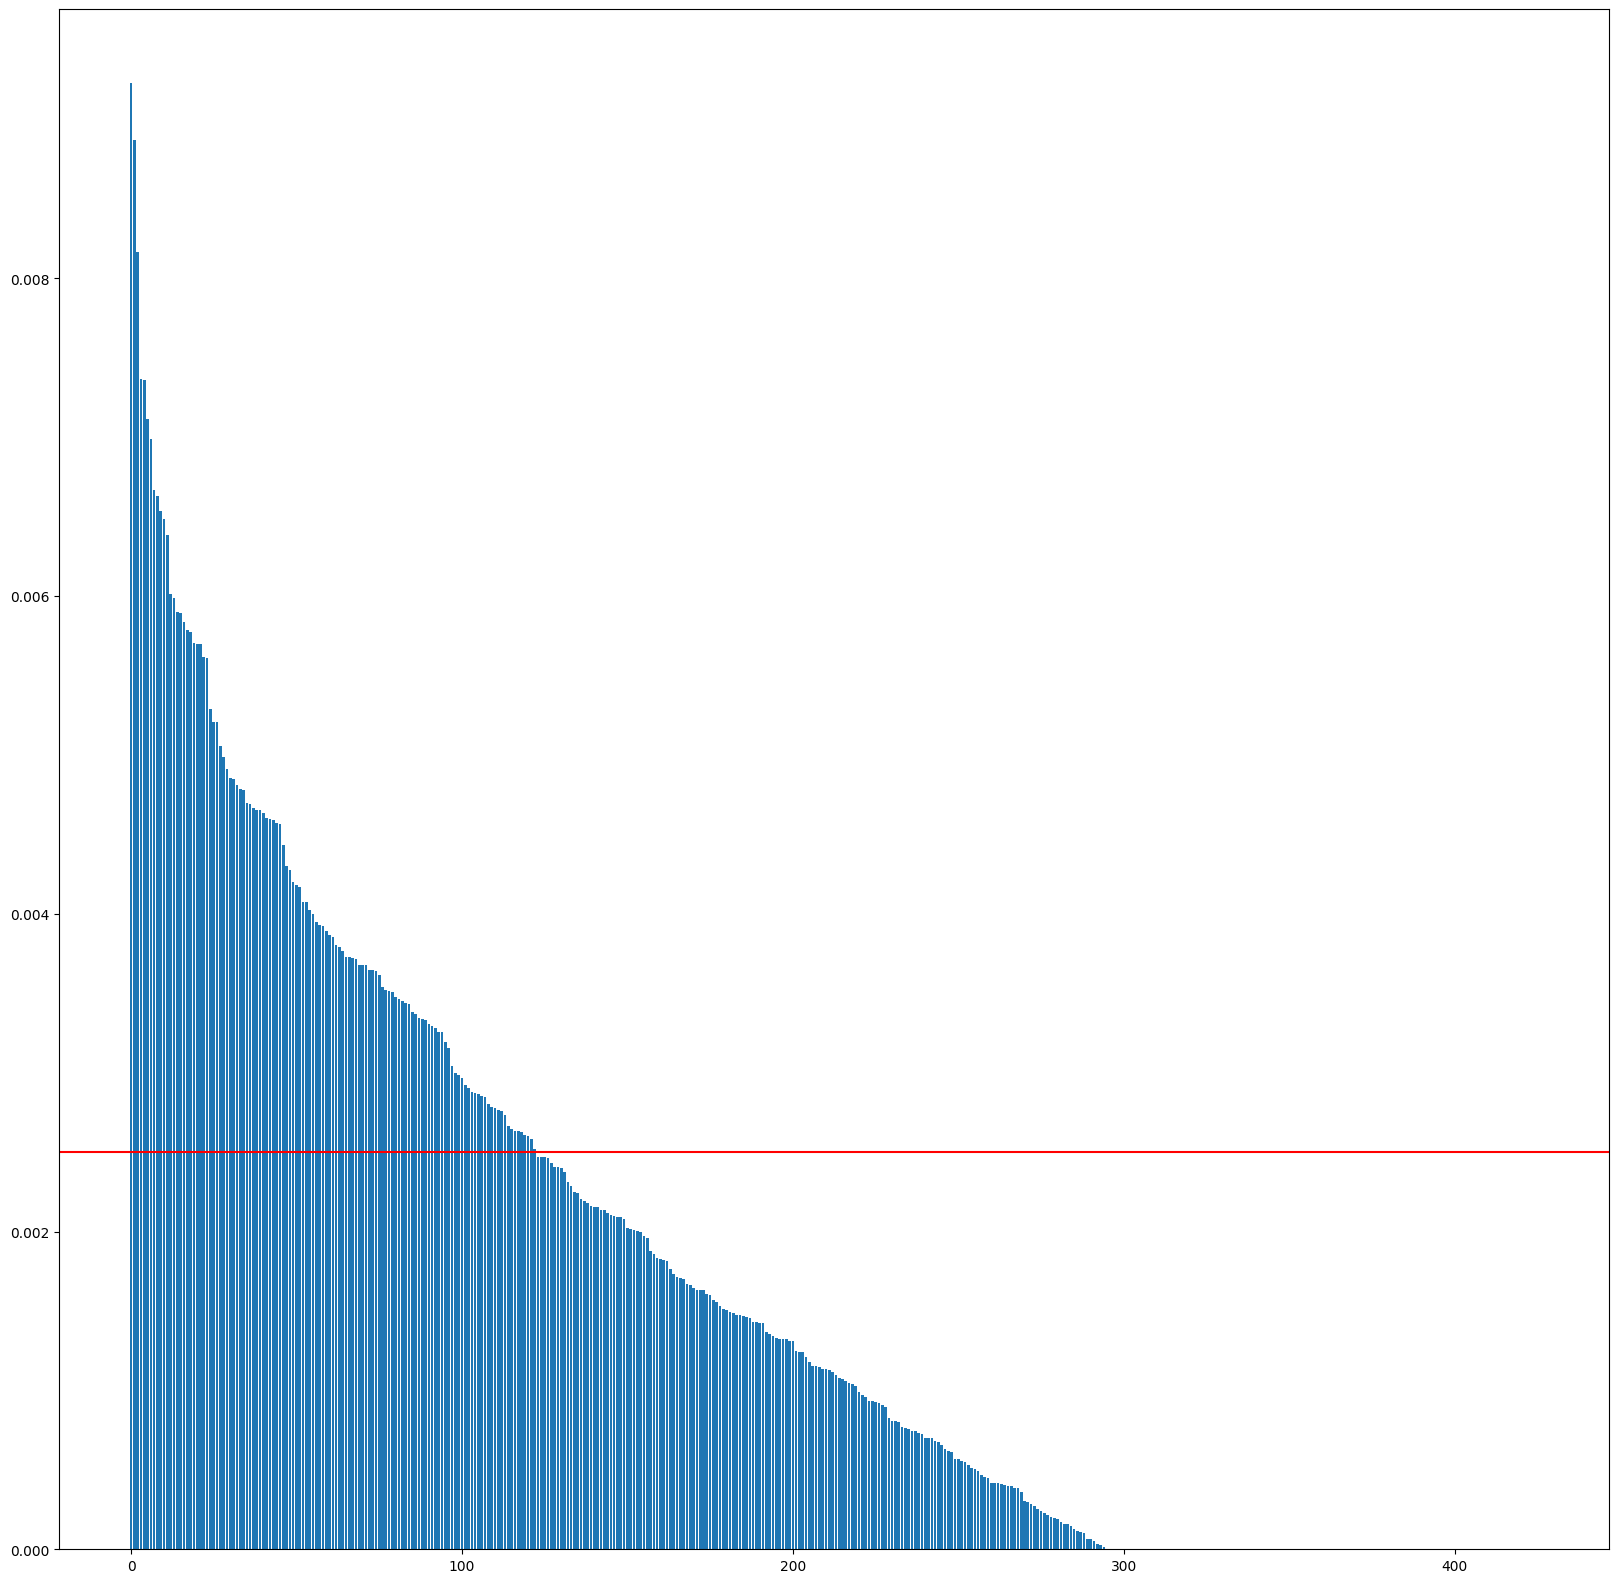

number of features with scores above the threshold: 123


In [38]:
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
print(f"min: {min(scores)}")
print(f"max: {max(scores)}")

# sort the scores in descending order
scores.sort(reverse=True)


threshold = 0.0025
# plot the scores
# draw a vertical line at the threshold
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()

# get the number of features with scores above the threshold

num_features = len([i for i in scores if i > threshold])
print(f"number of features with scores above the threshold: {num_features}")


In [39]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)

In [40]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.4611316435067427 
test accuracy: 0.8524 
train accuracy: 1.0000 
ROAUC: 0.6810594862973482 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.46      6959
weighted avg       0.87      0.85      0.78      6959


Elapsed time to compute Random Forest 1/1: 0 minutes and 3 seconds
average test accuracy: 0.8524213249030033


In [41]:
max2 = max(scores)
min2 = min(scores)
range2 =  max2 - min2
print(f"range: {range2}")

# get the threshold
threshold = min2 + range2 * 0.1
print(f"threshold: {threshold}")

range: 0.009232722375580371
threshold: 0.0009232722375580372


In [42]:
accuracy_scores = []
for i in range(1,10):
    print(f"{i}:\n")
    threshold = range2 * i / 10
    print(f"Threshold: {threshold}")
    num_features = len([sc for sc in scores if sc > threshold])
    print(f"number of features with scores above the threshold: {num_features}")
    if num_features == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold,np.mean(test_accuracies)))

1:

Threshold: 0.0009232722375580371
number of features with scores above the threshold: 226
Forest 1/2 trained with 
F1 score: 0.4671374214830539 
test accuracy: 0.8533 
train accuracy: 1.0000 
ROAUC: 0.6853046415096566 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.47      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 4 seconds
Forest 2/2 trained with 
F1 score: 0.4681318819651376 
test accuracy: 0.8534 
train accuracy: 1.0000 
ROAUC: 0.689747514707069 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.02      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50    

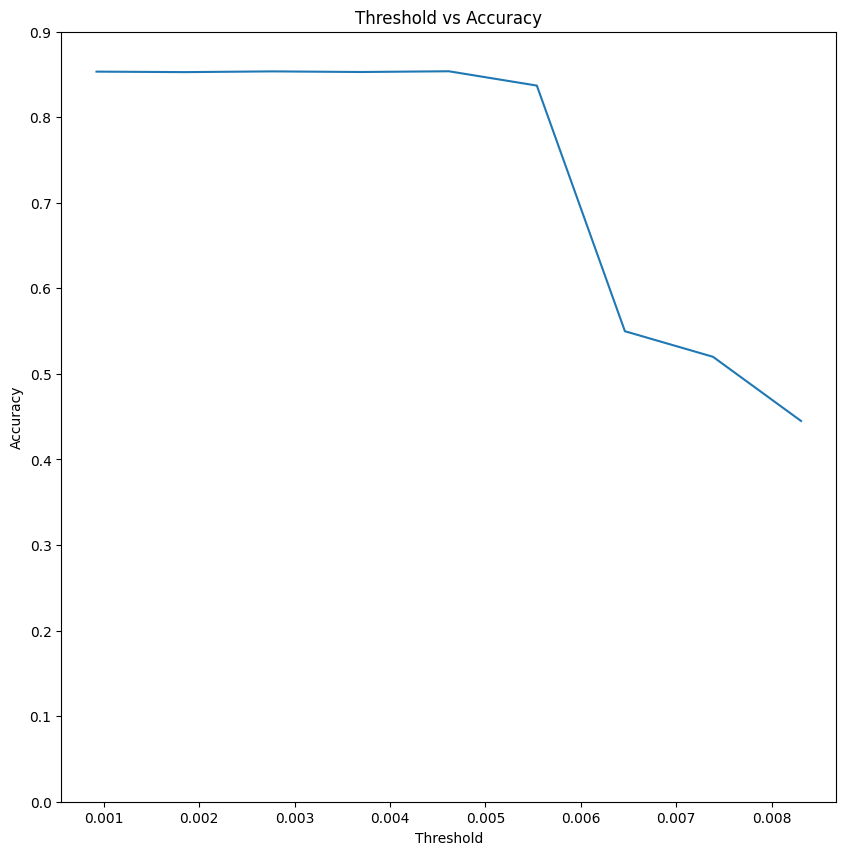

In [43]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
# plt.xticks(np.arange(min([i[0] for i in accuracy_scores]), max([i[0] for i in accuracy_scores])+0.1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [44]:
accuracy_scores = []
prev_num_feat = 0
th = 0.0055
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= 0.0005
        continue
    if th < 0.003:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((th,np.mean(test_accuracies)))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= 0.0005

Threshold: 0.0055
number of features with scores above the threshold: 24
Forest 1/2 trained with 
F1 score: 0.5210166431593795 
test accuracy: 0.8247 
train accuracy: 0.9635 
ROAUC: 0.6017918776697259 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5931
           1       0.25      0.10      0.14      1028

    accuracy                           0.82      6959
   macro avg       0.56      0.52      0.52      6959
weighted avg       0.77      0.82      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 2 seconds
Forest 2/2 trained with 
F1 score: 0.5226471149431032 
test accuracy: 0.8263 
train accuracy: 0.9629 
ROAUC: 0.6051190506650082 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5931
           1       0.26      0.10      0.14      1028

    accuracy                           0.83      6959
   macro avg       0.56      0.52      0.52      6959
we

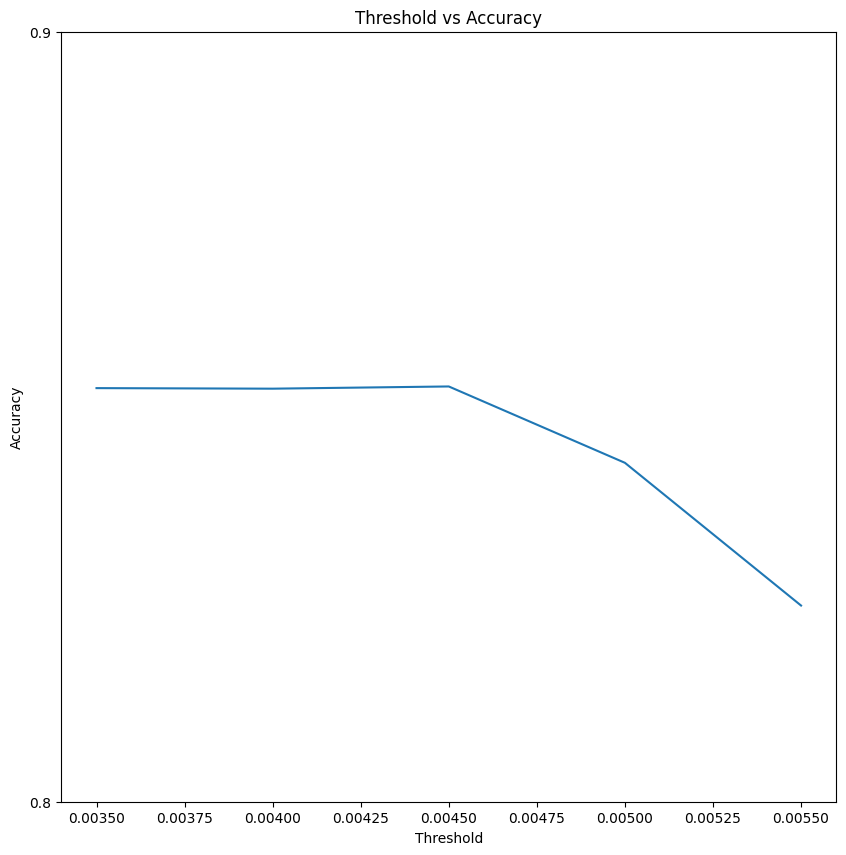

In [45]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
plt.yticks(np.arange(0.8, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [49]:
# get the feature above 0.00448
num_features = len([sc for sc in scores if sc > 0.00448])
print(f"number of features with scores above the threshold: {num_features}")

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
print(f"average test accuracy: {np.mean(test_accuracies)}")

number of features with scores above the threshold: 46
Forest 1/2 trained with 
F1 score: 0.4793833373166858 
test accuracy: 0.8539 
train accuracy: 0.9993 
ROAUC: 0.64502683912989 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       0.69      0.02      0.04      1028

    accuracy                           0.85      6959
   macro avg       0.77      0.51      0.48      6959
weighted avg       0.83      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 2 seconds
Forest 2/2 trained with 
F1 score: 0.4756261768187259 
test accuracy: 0.8536 
train accuracy: 0.9993 
ROAUC: 0.6419049287296779 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       0.70      0.02      0.03      1028

    accuracy                           0.85      6959
   macro avg       0.77      0.51      0.48      6959
weighted avg       0.8

In [51]:
# print the features with scores above 0.00448
for i in range(len(fs.scores_)):
    if fs.scores_[i] > 0.00448:
        print(f"Feature {i}: {fs.scores_[i]}, {fs.feature_names_in_[i]}")

Feature 3: 0.007409165277733276, Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?
Feature 5: 0.006583297893540285, ('Q1- Your sex?_A woman',)
Feature 44: 0.005270994650316441, ('Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No',)
Feature 53: 0.005374429936290115, ('Q12- Do you work most often?_In a workshop, a technical room',)
Feature 73: 0.00795533028296136, ('Q13- Is the performance of your work taxing on you?-To work on screen_Most of the time',)
Feature 91: 0.005857666661541305, ('Q14- During your work, are you in a situation? (Of-handle toxic or dangerous products_No',)
Feature 94: 0.008709181293800494, ('Q14- During your work, are you in a situation? (Of-risk a serious fall_No',)
Feature 97: 0.005025893281298099, ('Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury_No',)
Featur